# Chapter 2
`summer` validation to the Vynnycky and White outputs for Chapter 2.

In [1]:
from summer import CompartmentalModel
import matplotlib.pyplot as plt

In [2]:
# Model input parameters
t_step = 1  # Size of time step (days)
tot_popn = 100000  # Total population size
ave_preinfous = 2  # Average pre-infectious period (days)
ave_infous = 2  # Average duration of infectiousness (days)
R0 = 2  # R0

# Parameters derived from the above, no need to consider time step, which is done automatically
beta = R0 / ave_infous  # No need to divide by population because this is part of infection_frequency
infous_rate = 1 / ave_preinfous
rec_rate = 1 / ave_infous

infectious_seed = 1

In [3]:
# Set up the SEIR model
compartments = (
    "Susceptible", 
    "Pre-infectious", 
    "Infectious", 
    "Immune"
)

seir_model = CompartmentalModel(
    times=(0, 200),
    compartments=compartments,
    infectious_compartments=("Infectious",),
    timestep=t_step,
)

seir_model.set_initial_population(
    distribution={
        "Susceptible": tot_popn - infectious_seed, 
        "Infectious": infectious_seed
    }
)

seir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=beta,
    source="Susceptible",
    dest="Pre-infectious"
)

seir_model.add_transition_flow(
    name="progression", 
    fractional_rate=infous_rate,
    source="Pre-infectious", 
    dest="Infectious"
)

seir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)

seir_model.request_output_for_flow(
    name="incidence", 
    flow_name="progression"
)

### Fig. 2.8, page 36, Vynnycky and White
Also identical to Figure 1 from `model 2.1.xlsx` in worked examples.

In [4]:
# Run our SEIR model
seir_model.run()
seir_compartments = seir_model.get_outputs_df()

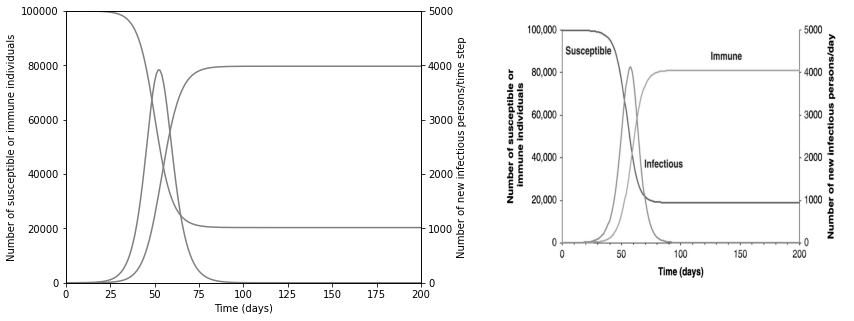

In [5]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(14, 5))
twin_ax = left_ax.twinx()

# Plot our modelled data
left_ax.plot(seir_compartments[["Susceptible", "Immune"]], color="gray")
twin_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="gray")

# Comparison graph from textbook
image = plt.imread("fig_2_8.jpg")
right_ax.axis("off")
right_ax.imshow(image, aspect="auto")

# Tidy up
left_ax.set_xlabel("Time (days)")
left_ax.set_xlim((0, 200))
left_ax.set_ylim((0, 1e5))
left_ax.set_ylabel("Number of susceptible or immune individuals")
twin_ax.set_ylim((0, 5000))
twin_ax.set_ylabel("Number of new infectious persons/time step");

### Figure 1 from `model 2.1a.xlsx` in worked examples
Very similar to Figure 1 from `model 2.1.xlsx`, and also includes the outputs from the other inset figure in `model 2.1.xlsx`.

In [6]:
# Use the same model, but request an additional output
seir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

seir_model.run()

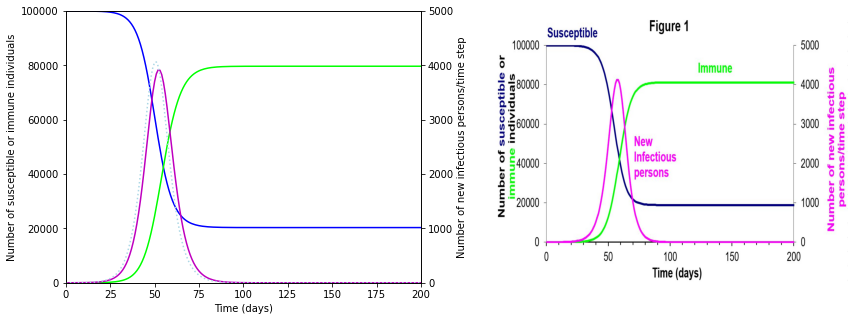

In [7]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(14, 5))
twin_ax = left_ax.twinx()

# Plot
left_ax.plot(seir_compartments["Susceptible"], color="b")
left_ax.plot(seir_compartments["Immune"], color="lime")
twin_ax.plot(seir_model.derived_outputs["incidence"], color="m")
twin_ax.plot(seir_model.derived_outputs["infection"], color="lightblue", linestyle=":")

# Comparison graph from textbook
image = plt.imread("model_2_1_fig_1.JPG")
right_ax.axis("off")
right_ax.imshow(image, aspect="auto")

# Tidy up
left_ax.set_xlabel("Time (days)")
left_ax.set_xlim((0, 200))
left_ax.set_ylim((0, 1e5))
left_ax.set_ylabel("Number of susceptible or immune individuals")
twin_ax.set_ylim((0, 5000))
twin_ax.set_ylabel("Number of new infectious persons/time step");

In [8]:
# Set up the SIR model
compartments = ("Susceptible", "Infectious", "Immune")
sir_model = CompartmentalModel(
    times=[0, 200],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)

sir_model.set_initial_population(
    distribution={
        "Susceptible": tot_popn - infectious_seed, 
        "Infectious": infectious_seed
    }
)

sir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=1, 
    source="Susceptible", 
    dest="Infectious"
)

sir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)

sir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

### Figure 2 from `model 2.1a.xlsx` in worked examples

In [9]:
# Run the SIR model
sir_model.run()
sir_compartments = sir_model.get_outputs_df()

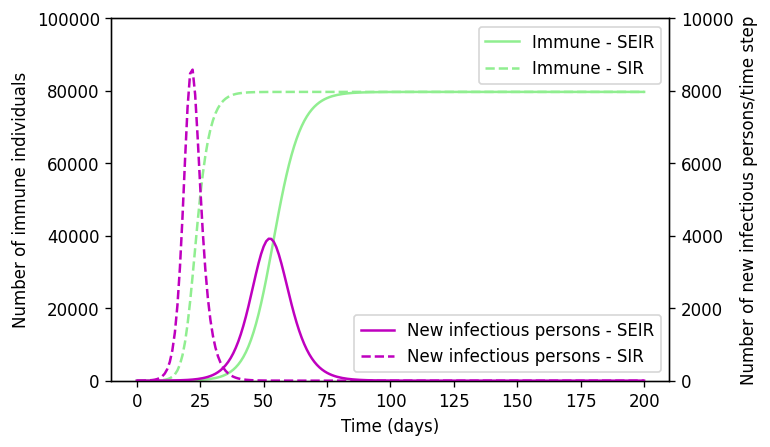

In [10]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(14, 5))
twin_ax = left_ax.twinx()

# Plot
left_ax.plot(seir_compartments["Immune"], color="lightgreen", label="Immune - SEIR")
left_ax.plot(sir_compartments["Immune"], color="lightgreen", linestyle="--", label="Immune - SIR")
right_ax.plot(seir_model.derived_outputs["incidence"], color="m", label="New infectious persons - SEIR")
right_ax.plot(sir_model.derived_outputs["infection"], color="m", linestyle="--", label="New infectious persons - SIR")

# Comparison graph from textbook
image = plt.imread("model_2_1a_fig_2.JPG")
right_ax.axis("off")
right_ax.imshow(image, aspect="auto")

# Tidy up
left_ax.set_xlabel("Time (days)")
left_ax.set_ylim((0, 1e5))
left_ax.set_ylabel("Number of immune individuals")
right_ax.set_ylim((0, 1e4))
right_ax.set_ylabel("Number of new infectious persons/time step")
left_ax.legend()
right_ax.legend(loc=4);